<a href="https://colab.research.google.com/github/tenacioussami/Deep-Learning/blob/main/Skill_Morph_Deep_Learning_and_Perceptron_Lecture_12_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning and Perceptron - Tutorial

## Topics Covered:
1. Deep Learning vs Traditional ML
2. How Perceptron Works
3. Activation Functions
4. Batch GD vs Stochastic GD
5. Practice with Iris Dataset

---

## Part 1: Deep Learning vs Traditional ML

### Key Differences:

| Aspect | Traditional ML | Deep Learning |
|--------|---------------|---------------|
| Features | Manual (we create) | Automatic (model learns) |
| Data Needed | Small datasets work | Needs large datasets |
| Training Time | Fast | Slow |
| Accuracy | Plateaus with more data | Improves with more data |

### Example: Image Recognition
- **Traditional ML**: We extract features (edges, colors) → Feed to classifier
- **Deep Learning**: Raw pixels → Neural network learns features automatically

### Perceptron = Simplest neural network unit (single neuron)!


## Part 2: How Perceptron Works

### Perceptron Formula:
```
z = w₁×x₁ + w₂×x₂ + ... + wₙ×xₙ + b
y = activation(z)
```

**Components:**
- **x (inputs)**: Your data features
- **w (weights)**: Importance of each feature (learned by model)
- **b (bias)**: Shifts the decision boundary
- **Activation**: Transforms the output

### Why Activation Functions?
They add non-linearity, helping the model learn complex patterns!


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Two most important activation functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)



## Part 3: Batch vs Stochastic Gradient Descent

### Gradient Descent = Learning algorithm for the model

**Weight update rule:**
```
w = w - learning_rate × gradient
```

### Two Main Types:

| Method | How Much Data | Advantages | Disadvantages |
|--------|----------------|------|------|
| **Batch GD** | All data at once | Stable, smooth convergence | Slow, needs more memory |
| **Stochastic GD** | One sample at a time | Fast, escapes local minima | Noisy, unstable |



## Part 4: Simple Perceptron Implementation

Let's build a Perceptron from scratch

In [ ]:
class Perceptron:
    def __init__(self, lr=0.01, epochs=100, mode='batch'):
        self.lr = lr
        self.epochs = epochs
        self.mode = mode
        self.w = None
        self.b = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-np.clip(z, -500, 500)))

    def fit(self, X, y):
        n, d = X.shape
        self.w = np.zeros(d)
        self.b = 0

        for epoch in range(self.epochs):
            if self.mode == 'batch':
                z = X.dot(self.w) + self.b
                pred = self.sigmoid(z)
                self.w -= self.lr * X.T.dot(pred - y) / n
                self.b -= self.lr * (pred - y).mean()
            else:
                for i in range(n):
                    z = X[i].dot(self.w) + self.b
                    pred = self.sigmoid(z)
                    self.w -= self.lr * (pred - y[i]) * X[i]
                    self.b -= self.lr * (pred - y[i])

    def predict(self, X):
        return (self.sigmoid(X.dot(self.w) + self.b) >= 0.5).astype(int)

print("Perceptron class created!")

Perceptron class created!


## Part 5: Practice with Iris Dataset

### Task: Classify Iris flowers (Setosa vs Others)

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Load data
iris = load_iris()
X = iris.data
y = (iris.target == 0).astype(int)

print(f"Total samples: {len(X)}")
print(f"Setosa: {sum(y)}, Others: {len(y) - sum(y)}")

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize (important!)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("\nData ready!")

Total samples: 150
Setosa: 50, Others: 100

Data ready!


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Train with Batch GD
print("="*50)
print("Training with BATCH Gradient Descent")
print("="*50)

model_batch = Perceptron(lr=0.1, epochs=200, mode='batch')
model_batch.fit(X_train, y_train)

y_pred_batch = model_batch.predict(X_test)
acc_batch = accuracy_score(y_test, y_pred_batch)
prec_batch = precision_score(y_test, y_pred_batch)
rec_batch = recall_score(y_test, y_pred_batch)
f1_batch = f1_score(y_test, y_pred_batch)

print(f"\nTest Accuracy:  {acc_batch*100:.2f}%")
print(f"Precision:      {prec_batch*100:.2f}%")
print(f"Recall:         {rec_batch*100:.2f}%")
print(f"F1-Score:       {f1_batch*100:.2f}%")
print(f"\nCorrect: {sum(y_pred_batch == y_test)}/{len(y_test)}")

Training with BATCH Gradient Descent

Test Accuracy:  100.00%
Precision:      100.00%
Recall:         100.00%
F1-Score:       100.00%

Correct: 30/30


In [ ]:
# Train with Stochastic GD
print("="*50)
print("Training with STOCHASTIC Gradient Descent")
print("="*50)

model_sgd = Perceptron(lr=0.01, epochs=200, mode='stochastic')
model_sgd.fit(X_train, y_train)

y_pred_sgd = model_sgd.predict(X_test)
acc_sgd = accuracy_score(y_test, y_pred_sgd)
prec_sgd = precision_score(y_test, y_pred_sgd)
rec_sgd = recall_score(y_test, y_pred_sgd)
f1_sgd = f1_score(y_test, y_pred_sgd)

print(f"\nTest Accuracy:  {acc_sgd*100:.2f}%")
print(f"Precision:      {prec_sgd*100:.2f}%")
print(f"Recall:         {rec_sgd*100:.2f}%")
print(f"F1-Score:       {f1_sgd*100:.2f}%")
print(f"\nCorrect: {sum(y_pred_sgd == y_test)}/{len(y_test)}")

Training with STOCHASTIC Gradient Descent

Test Accuracy:  100.00%
Precision:      100.00%
Recall:         100.00%
F1-Score:       100.00%

Correct: 30/30


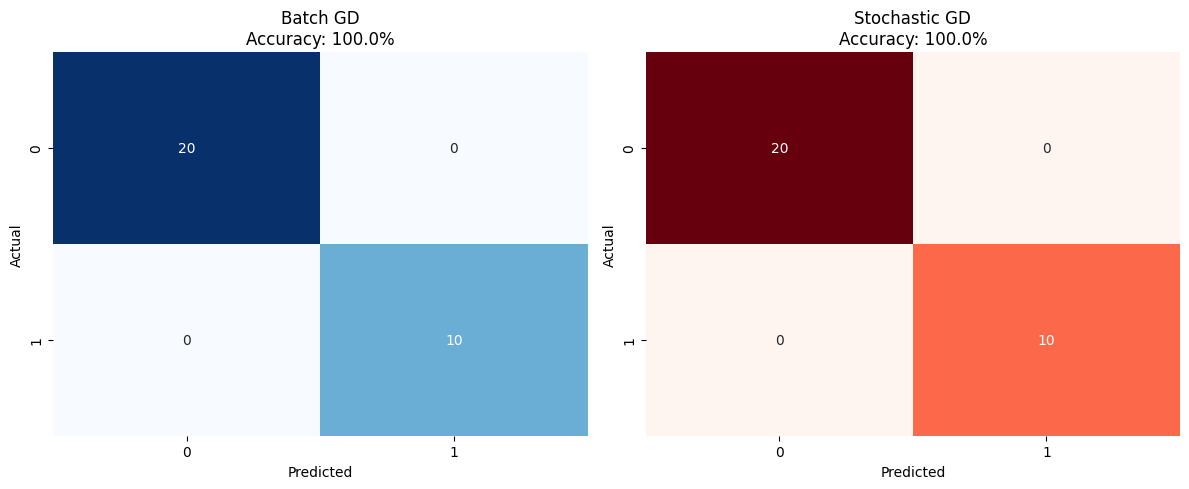


COMPARISON: Batch GD vs Stochastic GD
Metric               Batch GD             Stochastic GD       
----------------------------------------------------------------------
Accuracy                         100.00%             100.00%
Precision                        100.00%             100.00%
Recall                           100.00%             100.00%
F1-Score                         100.00%             100.00%
Training complete!


In [ ]:
# Compare Results
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Confusion Matrix - Batch
cm_batch = confusion_matrix(y_test, y_pred_batch)
sns.heatmap(cm_batch, annot=True, fmt='d', cmap='Blues', ax=axes[0], cbar=False)
axes[0].set_title(f'Batch GD\nAccuracy: {acc_batch*100:.1f}%', fontsize=12)
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Confusion Matrix - Stochastic
cm_sgd = confusion_matrix(y_test, y_pred_sgd)
sns.heatmap(cm_sgd, annot=True, fmt='d', cmap='Reds', ax=axes[1], cbar=False)
axes[1].set_title(f'Stochastic GD\nAccuracy: {acc_sgd*100:.1f}%', fontsize=12)
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Print comparison table
print("\n" + "="*70)
print("COMPARISON: Batch GD vs Stochastic GD")
print("="*70)
print(f"{'Metric':<20} {'Batch GD':<20} {'Stochastic GD':<20}")
print("-"*70)
print(f"{'Accuracy':<20} {acc_batch*100:>18.2f}% {acc_sgd*100:>18.2f}%")
print(f"{'Precision':<20} {prec_batch*100:>18.2f}% {prec_sgd*100:>18.2f}%")
print(f"{'Recall':<20} {rec_batch*100:>18.2f}% {rec_sgd*100:>18.2f}%")
print(f"{'F1-Score':<20} {f1_batch*100:>18.2f}% {f1_sgd*100:>18.2f}%")
print("="*70)
print("Training complete!")
print("="*70)

## Key Observations:

### Batch GD:
- Stable training
- Predictable convergence
- Processes all data each epoch (slower)

### Stochastic GD:
- Fast per epoch
- Can escape local minima
- Updates are noisy but converges

### Understanding the Metrics:

**Why not just use Accuracy?**
- Accuracy can be misleading, especially with imbalanced data!

**Precision**: When model predicts positive (Setosa), how often is it correct?
- Formula: `Precision = TP / (TP + FP)`
- High precision = Few false alarms

**Recall**: Of all actual positives (Setosa), how many did we find?
- Formula: `Recall = TP / (TP + FN)`
- High recall = We catch most positive cases

**F1-Score**: Harmonic mean of Precision and Recall
- Formula: `F1 = 2 × (Precision × Recall) / (Precision + Recall)`




## Homework Assignment

### Task: Credit Card Fraud Detection

**Dataset**: [Kaggle Credit Card Fraud](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)

### Your Tasks:

1. **Load and explore dataset**
   - Check class imbalance (fraud cases are very rare)

2. **Prepare data**
   - Handle missing data
   - Standardize features

3. **Train two models**
   - One with Batch GD
   - One with Stochastic GD

4. **Compare:**
   - Which converges faster?
   - Which has better accuracy?
   - Precision, Recall, F1-Score?



In [ ]:
# HOMEWORK

# import pandas as pd


# Step 1: Load data
# df = pd.read_csv('creditcard.csv')
# print(df.head())
# print(df['Class'].value_counts())

# Step 2: Prepare data
# X = df.drop('Class', axis=1).values
# y = df['Class'].values

# Step 3: Handle imbalance
# rus = RandomUnderSampler(random_state=42)
# X_balanced, y_balanced = rus.fit_resample(X, y)

# Step 4: Train both models and compare!
# Your code here...

print("Complete this code for homework!")